# Bag of Words (BOW) model in NLP
In Natural Language Processing (NLP) text data needs to be converted into numbers so that machine learning models can understand. It converts the text, document, sentence into the collection of words and count their frequency while ignoring the order of the words. It also ignores the grammar but focuses on counting how often each word appears in the text.

step 1: Preprocessing the Text
Before applying the BoW model, we need to preprocess the text.
1.


In [1]:
import re
import nltk
s = 'I am shiva chaudhary and A computer science student for geeks'
match = re.search(r'geeks', s) # word which you need to find , sentence where word are searched
if match:
  print('Start Index:', match.start())
  print('End Index:', match.end())
else:
  print("match not found")

Start Index: 56
End Index: 61


In [2]:
print(re.sub("ub", '-*', "Subject has uber booked already"))

S-*ject has -*er booked already


In [3]:
print(re.sub(r'\sAND\s', ' & ', "Baked Beans AND Spam"))

Baked Beans & Spam


In [4]:
print(re.sub(r'AND', '&', 'Baked Beans AND Spam'))

Baked Beans & Spam


In [5]:
from nltk.tokenize import WordPunctTokenizer
text = """
              The sun was hot above the blue sky as the dog and cat run around the house@#$$%%%.
              A baby sat near a tree, holding a red apple and a green book.
              Nearby, a bird began to sing on the window. The child gave a smile, feeling happy and soft inside.
              She loved to laugh, jump, and play in the rain. Her chair was beside a table with a pen, a flower, a glass of milk, and a toy car.
              She had 2 apples, 3 crayons, and 4 books. She would often read, eat, and think there. The moon was still faint in the morning light, and
              everything felt slow but strong. Soon, she would walk to school, ready to work, dance, and sleep well after. The cloud drifted by, orange and yellow, over her quiet bed.
         """

tokenizer = WordPunctTokenizer()
dataset = tokenizer.tokenize(text)

for i in range(len(dataset)):
  dataset[i] = dataset[i].lower()
  dataset[i] = re.sub(r'\W', ' ', dataset[i])
  dataset[i] = re.sub(r'\s+', ' ', dataset[i])

for i, sentence in enumerate(dataset):
  print(f"sentence {i+1}: {sentence}")



sentence 1: the
sentence 2: sun
sentence 3: was
sentence 4: hot
sentence 5: above
sentence 6: the
sentence 7: blue
sentence 8: sky
sentence 9: as
sentence 10: the
sentence 11: dog
sentence 12: and
sentence 13: cat
sentence 14: run
sentence 15: around
sentence 16: the
sentence 17: house
sentence 18:  
sentence 19: a
sentence 20: baby
sentence 21: sat
sentence 22: near
sentence 23: a
sentence 24: tree
sentence 25:  
sentence 26: holding
sentence 27: a
sentence 28: red
sentence 29: apple
sentence 30: and
sentence 31: a
sentence 32: green
sentence 33: book
sentence 34:  
sentence 35: nearby
sentence 36:  
sentence 37: a
sentence 38: bird
sentence 39: began
sentence 40: to
sentence 41: sing
sentence 42: on
sentence 43: the
sentence 44: window
sentence 45:  
sentence 46: the
sentence 47: child
sentence 48: gave
sentence 49: a
sentence 50: smile
sentence 51:  
sentence 52: feeling
sentence 53: happy
sentence 54: and
sentence 55: soft
sentence 56: inside
sentence 57:  
sentence 58: she
sentenc

In [6]:
import nltk
nltk.download("punkt_tab")

from nltk.tokenize import sent_tokenize
dataset = sent_tokenize(text)
print(dataset)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['\n              The sun was hot above the blue sky as the dog and cat run around the house@#$$%%%.', 'A baby sat near a tree, holding a red apple and a green book.', 'Nearby, a bird began to sing on the window.', 'The child gave a smile, feeling happy and soft inside.', 'She loved to laugh, jump, and play in the rain.', 'Her chair was beside a table with a pen, a flower, a glass of milk, and a toy car.', 'She had 2 apples, 3 crayons, and 4 books.', 'She would often read, eat, and think there.', 'The moon was still faint in the morning light, and\n              everything felt slow but strong.', 'Soon, she would walk to school, ready to work, dance, and sleep well after.', 'The cloud drifted by, orange and yellow, over her quiet bed.']


In [7]:
for i, sentence in enumerate(dataset):
  print(f"Sentence {i+1}: {sentence}")

Sentence 1: 
              The sun was hot above the blue sky as the dog and cat run around the house@#$$%%%.
Sentence 2: A baby sat near a tree, holding a red apple and a green book.
Sentence 3: Nearby, a bird began to sing on the window.
Sentence 4: The child gave a smile, feeling happy and soft inside.
Sentence 5: She loved to laugh, jump, and play in the rain.
Sentence 6: Her chair was beside a table with a pen, a flower, a glass of milk, and a toy car.
Sentence 7: She had 2 apples, 3 crayons, and 4 books.
Sentence 8: She would often read, eat, and think there.
Sentence 9: The moon was still faint in the morning light, and
              everything felt slow but strong.
Sentence 10: Soon, she would walk to school, ready to work, dance, and sleep well after.
Sentence 11: The cloud drifted by, orange and yellow, over her quiet bed.


In [8]:
for i in range(len(dataset)):
  dataset[i] = dataset[i].lower()
  dataset[i] = re.sub(r'\W', " ", dataset[i])
  dataset[i] = re.sub(r'\s+', " ", dataset[i])

for i, sentence in enumerate(dataset):
  print(f"Sentence {i+1}: {sentence}")


Sentence 1:  the sun was hot above the blue sky as the dog and cat run around the house 
Sentence 2: a baby sat near a tree holding a red apple and a green book 
Sentence 3: nearby a bird began to sing on the window 
Sentence 4: the child gave a smile feeling happy and soft inside 
Sentence 5: she loved to laugh jump and play in the rain 
Sentence 6: her chair was beside a table with a pen a flower a glass of milk and a toy car 
Sentence 7: she had 2 apples 3 crayons and 4 books 
Sentence 8: she would often read eat and think there 
Sentence 9: the moon was still faint in the morning light and everything felt slow but strong 
Sentence 10: soon she would walk to school ready to work dance and sleep well after 
Sentence 11: the cloud drifted by orange and yellow over her quiet bed 


In [10]:
from nltk.corpus import stopwords

nltk.download('stopwords')

# Counting word frequencies
word_count = {}

for sentence in dataset:
  words = nltk.word_tokenize(sentence)
  for word in words:
    if word not in word_count:
      word_count[word] = 1
    else:
      word_count[word] += 1

stop_words = set(stopwords.words('english'))

{'the': 10, 'sun': 1, 'was': 3, 'hot': 1, 'above': 1, 'blue': 1, 'sky': 1, 'as': 1, 'dog': 1, 'and': 10, 'cat': 1, 'run': 1, 'around': 1, 'house': 1, 'a': 11, 'baby': 1, 'sat': 1, 'near': 1, 'tree': 1, 'holding': 1, 'red': 1, 'apple': 1, 'green': 1, 'book': 1, 'nearby': 1, 'bird': 1, 'began': 1, 'to': 4, 'sing': 1, 'on': 1, 'window': 1, 'child': 1, 'gave': 1, 'smile': 1, 'feeling': 1, 'happy': 1, 'soft': 1, 'inside': 1, 'she': 4, 'loved': 1, 'laugh': 1, 'jump': 1, 'play': 1, 'in': 2, 'rain': 1, 'her': 2, 'chair': 1, 'beside': 1, 'table': 1, 'with': 1, 'pen': 1, 'flower': 1, 'glass': 1, 'of': 1, 'milk': 1, 'toy': 1, 'car': 1, 'had': 1, '2': 1, 'apples': 1, '3': 1, 'crayons': 1, '4': 1, 'books': 1, 'would': 2, 'often': 1, 'read': 1, 'eat': 1, 'think': 1, 'there': 1, 'moon': 1, 'still': 1, 'faint': 1, 'morning': 1, 'light': 1, 'everything': 1, 'felt': 1, 'slow': 1, 'but': 1, 'strong': 1, 'soon': 1, 'walk': 1, 'school': 1, 'ready': 1, 'work': 1, 'dance': 1, 'sleep': 1, 'well': 1, 'after': 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
import pandas as pd
filtered_word2count = {word: count for word, count in word_count.items() if word not in stop_words}

word_frequency_df = pd.DataFrame(list(filtered_word2count.items()), columns=['word', 'frequency'])
word_freq_df = word_frequency_df.sort_values(by='frequency', ascending=False)

In [12]:
print(word_freq_df)

       word  frequency
50    would          2
0       sun          1
2      blue          1
3       sky          1
4       dog          1
..      ...        ...
73  drifted          1
74   orange          1
75   yellow          1
76    quiet          1
77      bed          1

[78 rows x 2 columns]


In [13]:
# selecting the most frequenct words
import heapq
import matplotlib.pylab as plt

freq_words = heapq.nlargest(10, word_count, key=word_count.get)

print(f"Top 10 frequent words: {freq_words}")

Top 10 frequent words: ['a', 'the', 'and', 'to', 'she', 'was', 'in', 'her', 'would', 'sun']


In [14]:
top_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)[:10]
words, counts = zip(*top_words)

print(words, counts)

('a', 'the', 'and', 'to', 'she', 'was', 'in', 'her', 'would', 'sun') (11, 10, 10, 4, 4, 3, 2, 2, 2, 1)


In [15]:
print(sorted(word_count.items()))

[('2', 1), ('3', 1), ('4', 1), ('a', 11), ('above', 1), ('after', 1), ('and', 10), ('apple', 1), ('apples', 1), ('around', 1), ('as', 1), ('baby', 1), ('bed', 1), ('began', 1), ('beside', 1), ('bird', 1), ('blue', 1), ('book', 1), ('books', 1), ('but', 1), ('by', 1), ('car', 1), ('cat', 1), ('chair', 1), ('child', 1), ('cloud', 1), ('crayons', 1), ('dance', 1), ('dog', 1), ('drifted', 1), ('eat', 1), ('everything', 1), ('faint', 1), ('feeling', 1), ('felt', 1), ('flower', 1), ('gave', 1), ('glass', 1), ('green', 1), ('had', 1), ('happy', 1), ('her', 2), ('holding', 1), ('hot', 1), ('house', 1), ('in', 2), ('inside', 1), ('jump', 1), ('laugh', 1), ('light', 1), ('loved', 1), ('milk', 1), ('moon', 1), ('morning', 1), ('near', 1), ('nearby', 1), ('of', 1), ('often', 1), ('on', 1), ('orange', 1), ('over', 1), ('pen', 1), ('play', 1), ('quiet', 1), ('rain', 1), ('read', 1), ('ready', 1), ('red', 1), ('run', 1), ('sat', 1), ('school', 1), ('she', 4), ('sing', 1), ('sky', 1), ('sleep', 1), ('

In [17]:
top_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)[:10]
print(top_words)

[('a', 11), ('the', 10), ('and', 10), ('to', 4), ('she', 4), ('was', 3), ('in', 2), ('her', 2), ('would', 2), ('sun', 1)]


In [18]:
print(zip(*top_words))

In [20]:
words, counts = zip(*top_words)

In [21]:
print(words, counts)


('a', 'the', 'and', 'to', 'she', 'was', 'in', 'her', 'would', 'sun') (11, 10, 10, 4, 4, 3, 2, 2, 2, 1)


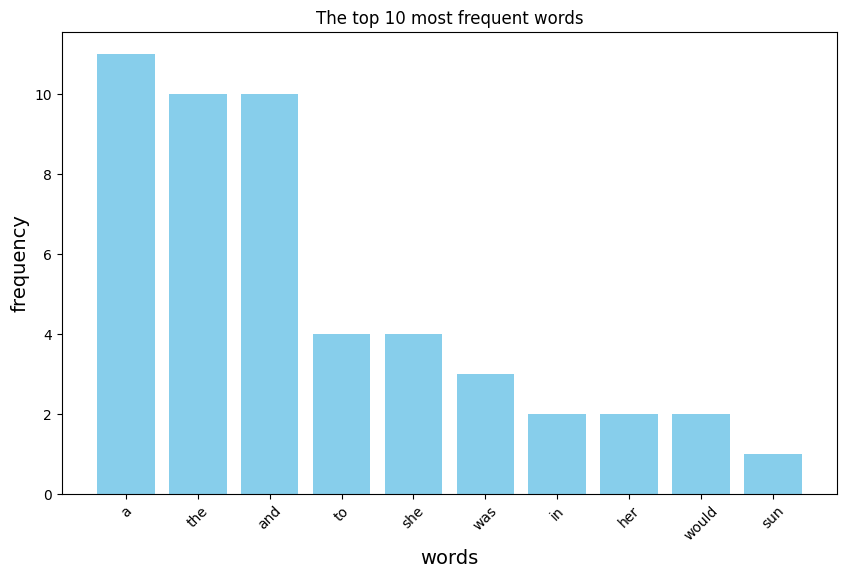

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title("The top 10 most frequent words")
plt.xlabel("words", fontsize=14)
plt.ylabel("frequency", fontsize=14)
plt.show()